### Using Seaborn for data visualization. Seaborn is a Python data visualization library

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
#loading an inbuilt tips dataset in seaborn
tips = sns.load_dataset('tips')

In [3]:
#general info(total bill, tips left, gender and day)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


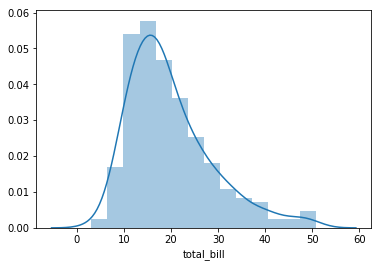

In [6]:
sns.distplot(tips['total_bill'])

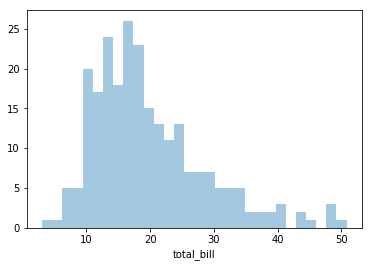

In [10]:
sns.distplot(tips['total_bill'],kde=False, bins=30)

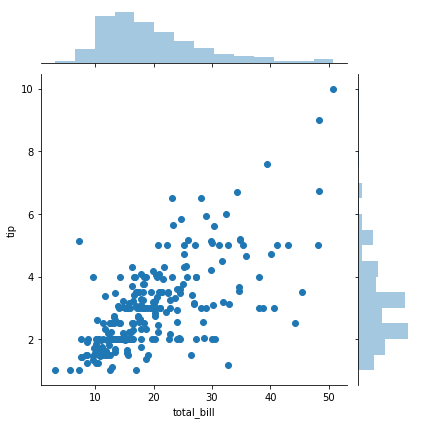

In [11]:
#Jointplot allows to combine 2 variables. This gives a scatter plot and two distribution plots
sns.jointplot(x='total_bill', y ='tip', data=tips, kind='scatter')

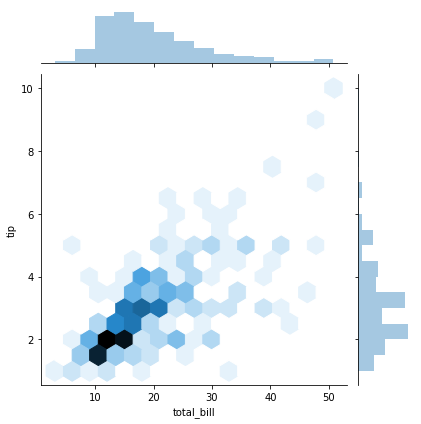

In [14]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

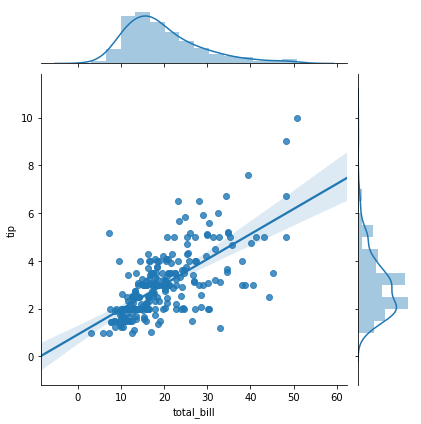

In [15]:
#Draw a regression line in the scatter plot to check the linear fit
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

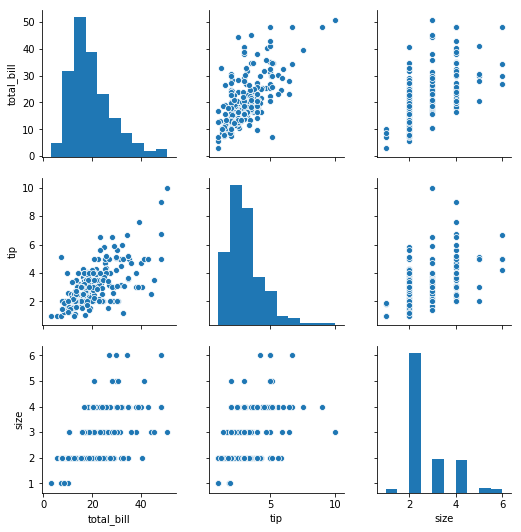

In [17]:
#Produce a possible combination of pair plots
#This can be use to check the correlation and visual the entire data
sns.pairplot(tips)

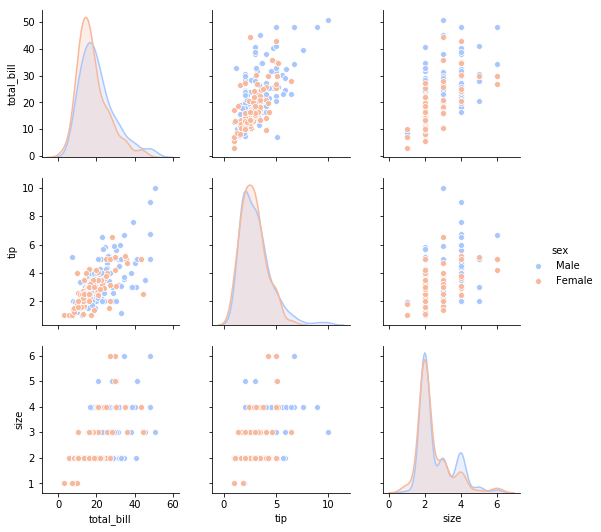

In [19]:
sns.pairplot(tips,hue='sex', palette='coolwarm')

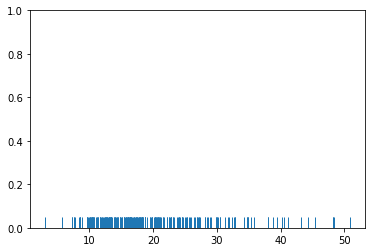

In [20]:
#draws a dash point for every single data point in the column
sns.rugplot(tips['total_bill'])

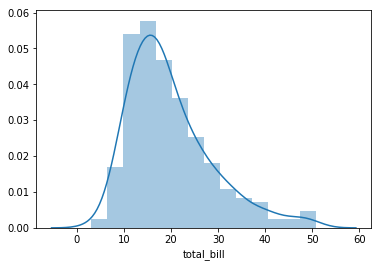

In [22]:
#histogram stacks the data points vs the rugplot. The normal distribution is similar to rugplot
sns.distplot(tips['total_bill'])

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

(0, 1)

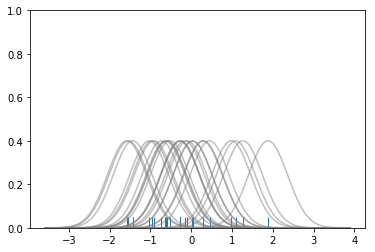

In [32]:
sns.rugplot(dataset)
x_min=dataset.min() -2
x_max = dataset.max()+2
x_axis = np.linspace(x_min, x_max, 100)


#the link to kernel density plot
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

#set the bandwith
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2
# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)


Text(0.5, 0.98, 'Sum of the Basis Functions')

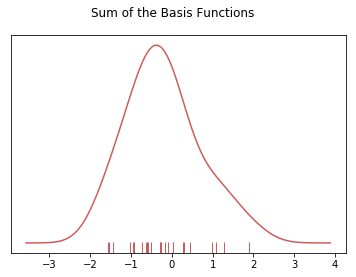

In [33]:
# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

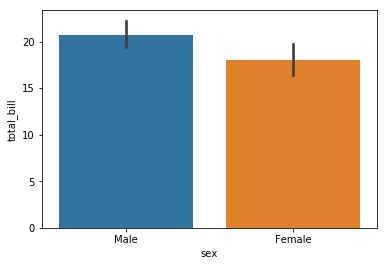

In [36]:
sns.barplot(x='sex',y='total_bill',data=tips)

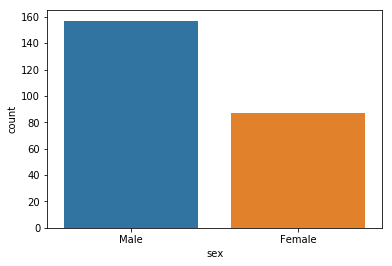

In [37]:
#Countplot is similar to barplot except the estimator is explicitly counting the number of occurrences
sns.countplot(x='sex', data=tips)

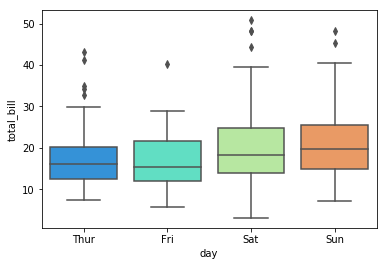

In [38]:
#use box plot to check the distribution
sns.boxplot(x='day', y ='total_bill', data= tips, palette='rainbow')

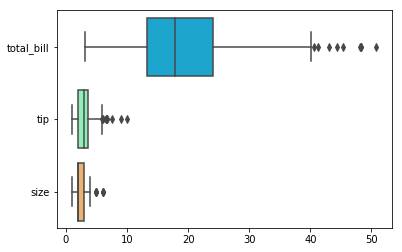

In [40]:
sns.boxplot(data=tips, palette='rainbow', orient='h')

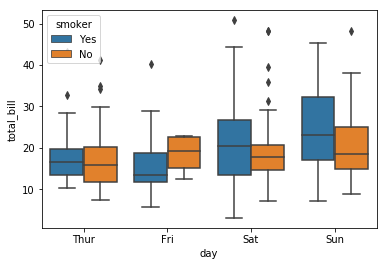

In [41]:
sns.boxplot(x='day', y='total_bill', hue='smoker',data=tips)

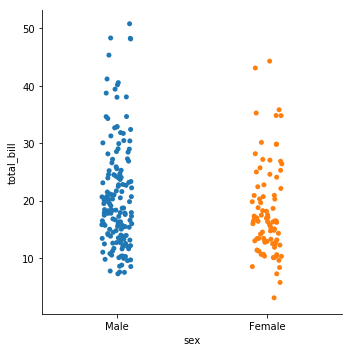

In [44]:
sns.catplot(x='sex',y='total_bill',data=tips)

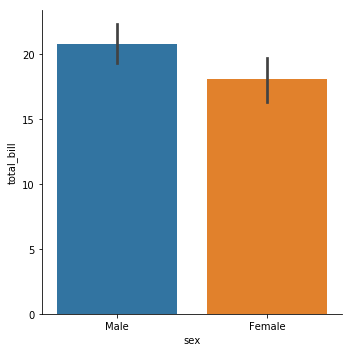

In [45]:
sns.catplot(x='sex',y='total_bill',data=tips, kind='bar')

### Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters

In [47]:
flights= sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
#Check the correlation of the numeric data point
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


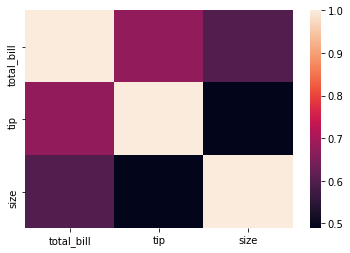

In [51]:
#get a heat map for the correlation data plot
sns.heatmap(tips.corr())

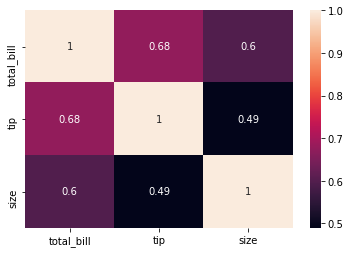

In [52]:
sns.heatmap(tips.corr(), annot=True)

In [53]:
flights.pivot_table(values='passengers', index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


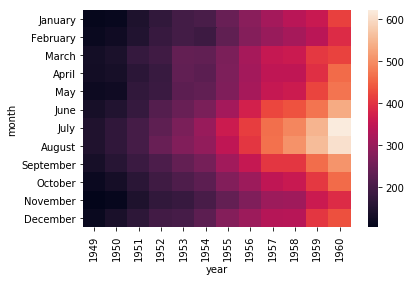

In [56]:
pvsFlights = flights.pivot_table(values='passengers', index='month', columns='year')
sns.heatmap(pvsFlights)

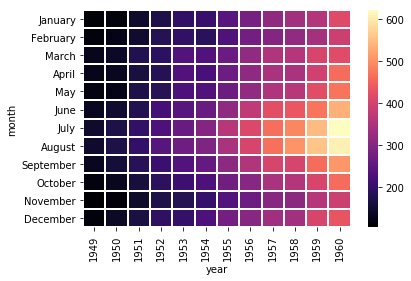

In [58]:
sns.heatmap(pvsFlights, cmap='magma', linecolor='white', linewidth=1)

## Clustermap is simlar to decision tree which cluster similar data points based on the mean or numeric properties

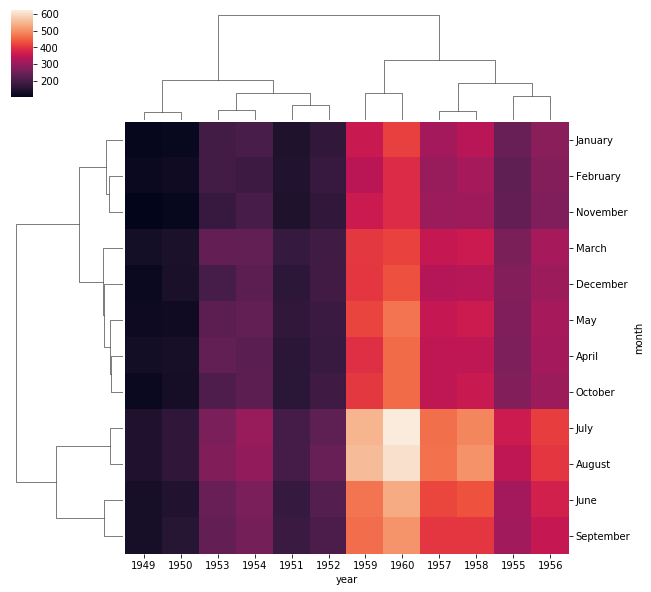

In [59]:
sns.clustermap(pvsFlights)

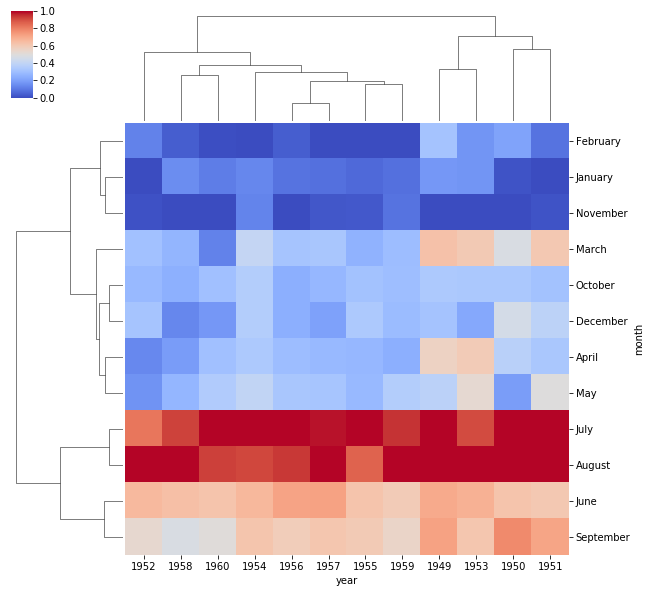

In [60]:
sns.clustermap(pvsFlights, cmap='coolwarm', standard_scale=1)